In [138]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [139]:
df = pd.read_csv('Updated_Frame_1.csv')
pd.set_option('display.max_columns', 26)
df.head()

,Location_type,zone,WH_regional_zone,num_refill_req_l3m,Competitor_in_mkt,Comp_Ref_Ratio,Ware_house_ID,WH_Manager_ID,WH_capacity_size,transport_issue_l1y,retail_shop_num,wh_owner_type,distributor_num,flood_impacted,flood_proof,electric_supply,dist_from_hub,workers_num,wh_est_year,storage_issue_reported_l3m,temp_reg_mach,approved_wh_govt_certificate,wh_breakdown_l3m,govt_check_l3m,product_wg_ton,Prop_Demand_E_Pk
0,Rural,East,Zone 1,6,6,1.142857,WH_119397,EID_69397,Small,1,6219,Company Owned,43,0,0,1,245,34.0,2009.0,20,1,A+,3,16,25139,0.216216
1,Rural,East,Zone 1,6,6,1.142857,WH_122017,EID_72017,Small,1,3610,Rented,41,0,0,0,218,18.0,NaN,14,0,B+,6,16,16088,0.216216
2,Rural,East,Zone 1,6,3,1.600000,WH_115101,EID_65101,Small,0,5182,Company Owned,50,0,0,0,59,22.0,NaN,4,1,C,3,31,5060,0.216216
3,Rural,East,Zone 1,6,4,1.600000,WH_104017,EID_54017,Small,0,4210,Company Owned,41,1,0,1,87,NaN,2020.0,8,0,B+,2,31,9131,0.216216
4,Rural,East,Zone 1,6,5,2.000000,WH_103234,EID_53234,Small,0,5597,Company Owned,15,0,0,0,99,40.0,2011.0,19,0,B+,2,31,22130,0.216216


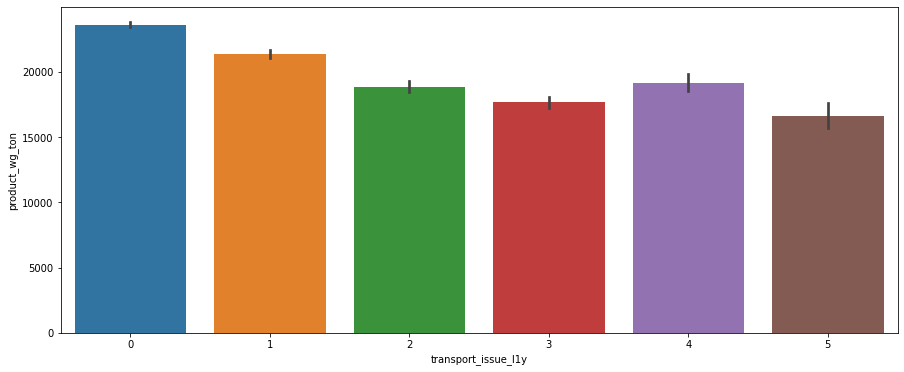

In [5]:
plt.figure(figsize=(15, 6))
sns.barplot(data=df, x='transport_issue_l1y', y='product_wg_ton')
plt.show()

In [22]:
df.groupby('transport_issue_l1y')['product_wg_ton'].agg(['mean', 'sum']).sort_values(by='sum', ascending=False)

,mean,sum
transport_issue_l1y,,
0,23606.135327,359167349
1,21346.655469,99133868
2,18858.304368,41450553
3,17673.043454,32129593
4,19171.751609,14896451
5,16632.209770,5788009


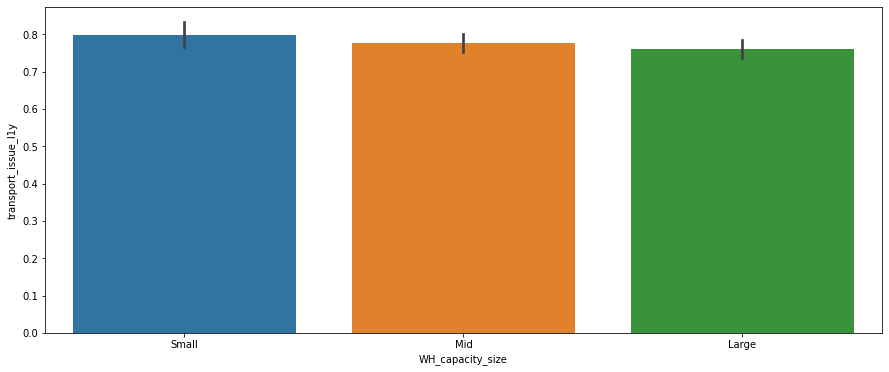

In [24]:
plt.figure(figsize=(15, 6))
sns.barplot(data=df, x='WH_capacity_size', y='transport_issue_l1y')
plt.show()

In [25]:
df.corr()['transport_issue_l1y']

num_refill_req_l3m            0.018549
Competitor_in_mkt            -0.005826
Comp_Ref_Ratio                0.002411
transport_issue_l1y           1.000000
retail_shop_num              -0.001826
distributor_num               0.008993
flood_impacted               -0.009596
flood_proof                   0.000022
electric_supply              -0.009299
dist_from_hub                 0.014336
workers_num                  -0.009004
wh_est_year                  -0.012910
storage_issue_reported_l3m   -0.144327
temp_reg_mach                 0.018207
wh_breakdown_l3m              0.012990
govt_check_l3m                0.002190
product_wg_ton               -0.173992
Prop_Demand_E_Pk              0.003297
Name: transport_issue_l1y, dtype: float64

In [39]:
tissue_loc = df.groupby(['Location_type', 'zone', 'WH_regional_zone'])['transport_issue_l1y'].value_counts().sort_values(ascending=False).reset_index(name='Value Counts')
tissue_loc

,Location_type,zone,WH_regional_zone,transport_issue_l1y,Value Counts
0,Rural,North,Zone 6,0,2511
1,Rural,West,Zone 6,0,1385
2,Rural,West,Zone 4,0,1118
3,Rural,North,Zone 5,0,1034
4,Rural,South,Zone 2,0,843
...,...,...,...,...,...
244,Urban,West,Zone 1,2,1
245,Urban,South,Zone 4,5,1
246,Urban,North,Zone 1,4,1
247,Urban,North,Zone 1,5,1


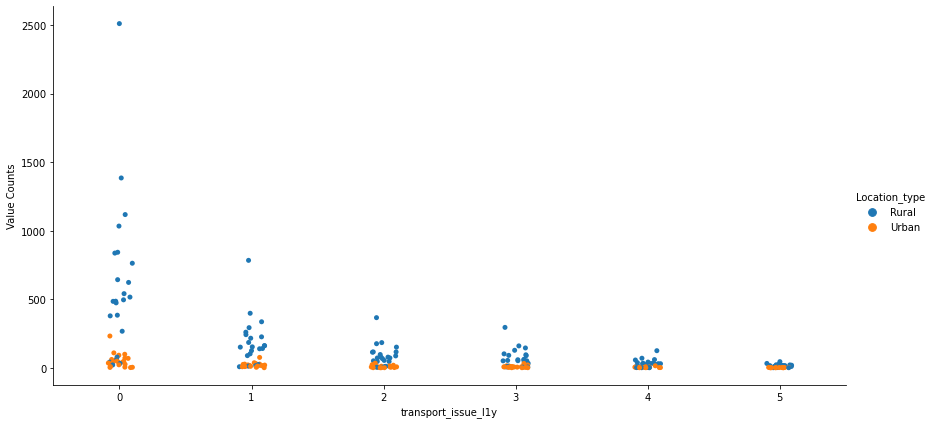

In [53]:
sns.catplot(data=tissue_loc, x='transport_issue_l1y', y='Value Counts', hue='Location_type', height=6, aspect=2)

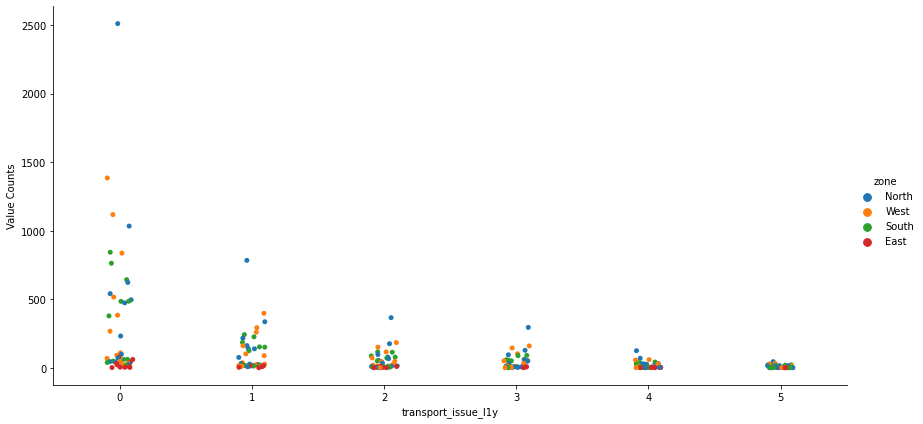

In [55]:
sns.catplot(data=tissue_loc, x='transport_issue_l1y', y='Value Counts', hue='zone', height=6, aspect=2)

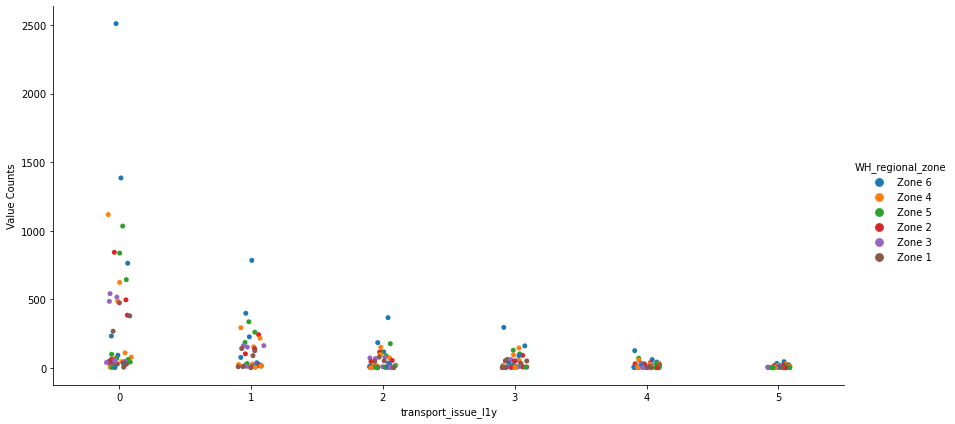

In [56]:
sns.catplot(data=tissue_loc, x='transport_issue_l1y', y='Value Counts', hue='WH_regional_zone', height=6, aspect=2)

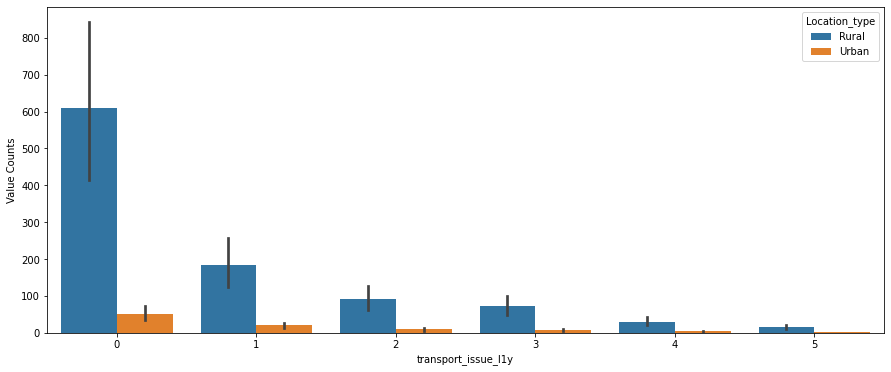

In [50]:
plt.figure(figsize=(15, 6))
sns.barplot(data=tissue_loc, x='transport_issue_l1y', y='Value Counts', hue='Location_type')
plt.show()

In [43]:
gt_100 = tissue_loc.loc[tissue_loc['Value Counts'] > 100, :]
lt_100 = tissue_loc.loc[tissue_loc['Value Counts'] < 100, :]

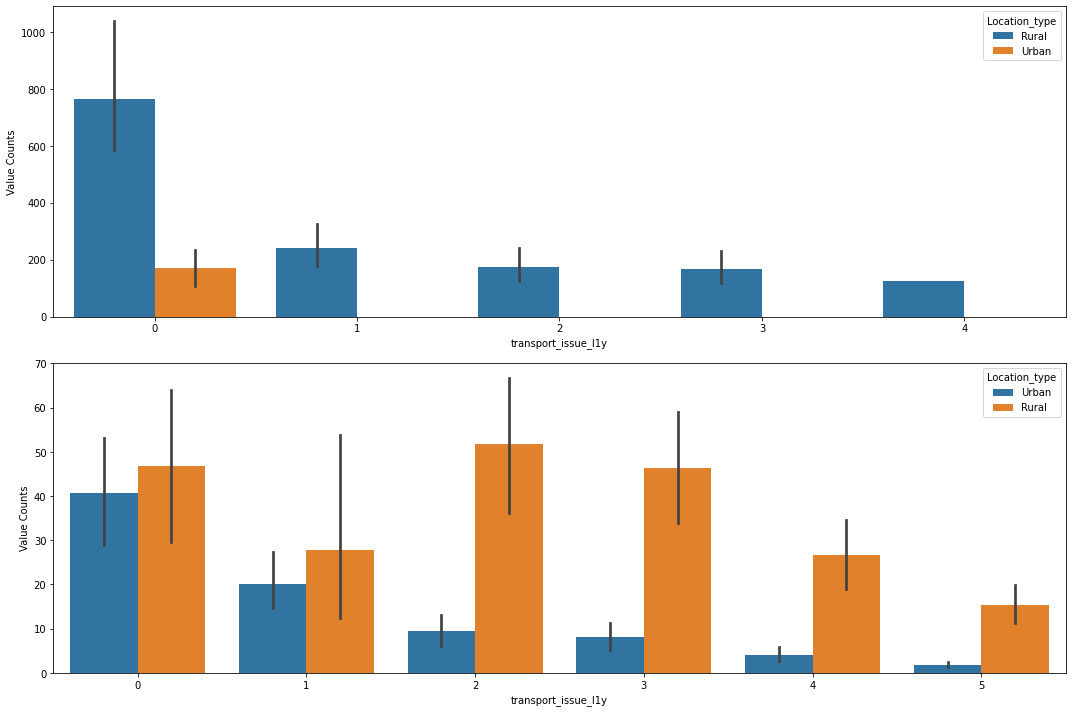

In [48]:
fig, ax = plt.subplots(2, 1, figsize=(15, 10))
sns.barplot(data=gt_100, x='transport_issue_l1y', y='Value Counts', hue='Location_type', ax=ax[0])
sns.barplot(data=lt_100, x='transport_issue_l1y', y='Value Counts', hue='Location_type', ax=ax[1])
plt.tight_layout()
plt.show()

<AxesSubplot:xlabel='Location_type,zone,WH_regional_zone,transport_issue_l1y'>

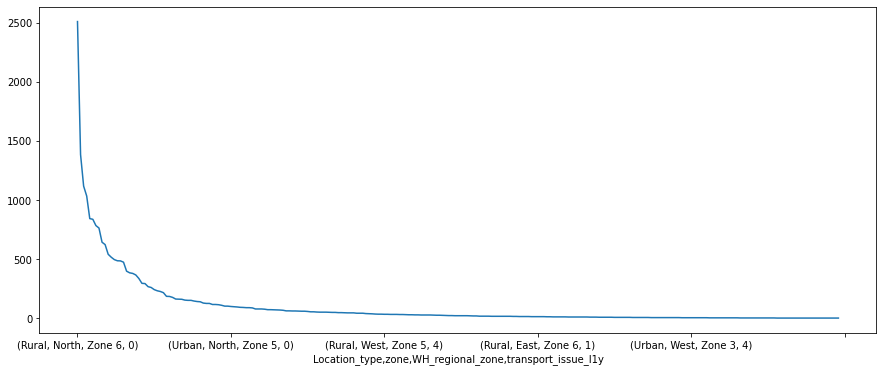

In [33]:
df.groupby(['Location_type', 'zone', 'WH_regional_zone'])['transport_issue_l1y'].value_counts().sort_values(ascending=False).plot(figsize=(15, 6))

In [27]:
df.groupby(['Location_type', 'zone', 'WH_regional_zone'])['transport_issue_l1y'].agg(['mean', 'count']).sort_values(by='count', ascending=False)

mean  count
Location_type zone  WH_regional_zone                 
Rural         North Zone 6            0.757635   4126
              West  Zone 6            0.741776   2219
                    Zone 4            0.780134   1792
              North Zone 5            0.816014   1761
              West  Zone 5            0.756026   1369
              South Zone 2            0.734967   1347
                    Zone 6            0.797297   1258
              North Zone 4            0.816231   1072
              South Zone 5            0.706287   1018
              North Zone 3            0.754587    872
              West  Zone 3            0.776596    846
              South Zone 3            0.813268    814
                    Zone 4            0.802469    810
              North Zone 1            0.807888    786
                    Zone 2            0.753512    783
              South Zone 1            0.787066    634
              West  Zone 2            0.730132    604
                    Zone 1            0.769401    451
Urban         North Zone 6            0.814249    393
              West  Zone 6            0.966480    179
                    Zone 4            0.758621    174
              North Zone 5            0.653846    156
Rural         East  Zone 4            0.856061    132
Urban         West  Zone 5            0.825000    120
              North Zone 4            0.763158    114
              South Zone 6            1.103774    106
Rural         East  Zone 3            0.760000    100
Urban         South Zone 2            0.731959     97
                    Zone 5            0.629213     89
              North Zone 3            0.887640     89
              West  Zone 3            0.831169     77
              South Zone 4            0.722222     72
              North Zone 2            0.830986     71
              South Zone 3            0.887324     71
Rural         East  Zone 5            0.700000     70
Urban         West  Zone 2            0.672131     61
Rural         East  Zone 6            0.785714     56
Urban         North Zone 1            1.090909     55
              South Zone 1            1.000000     46
              West  Zone 1            0.358974     39
Rural         East  Zone 1            0.945946     37
Urban         East  Zone 3            0.833333     12
                    Zone 4            0.900000     10
                    Zone 1            0.166667      6
                    Zone 5            0.500000      4
                    Zone 6            0.000000      2

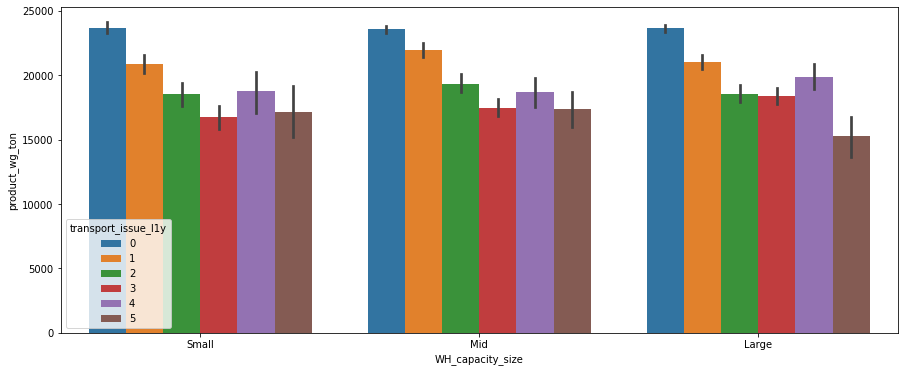

In [28]:
plt.figure(figsize=(15, 6))
sns.barplot(data=df, x='WH_capacity_size', y='product_wg_ton', hue='transport_issue_l1y')
plt.show()

In [51]:
df.corr()['transport_issue_l1y']

num_refill_req_l3m            0.018549
Competitor_in_mkt            -0.005826
Comp_Ref_Ratio                0.002411
transport_issue_l1y           1.000000
retail_shop_num              -0.001826
distributor_num               0.008993
flood_impacted               -0.009596
flood_proof                   0.000022
electric_supply              -0.009299
dist_from_hub                 0.014336
workers_num                  -0.009004
wh_est_year                  -0.012910
storage_issue_reported_l3m   -0.144327
temp_reg_mach                 0.018207
wh_breakdown_l3m              0.012990
govt_check_l3m                0.002190
product_wg_ton               -0.173992
Prop_Demand_E_Pk              0.003297
Name: transport_issue_l1y, dtype: float64

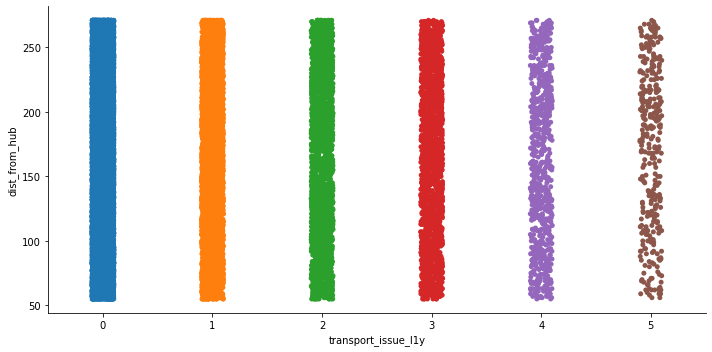

In [52]:
sns.catplot(data=df, x='transport_issue_l1y', y='dist_from_hub', height=5, aspect=2)

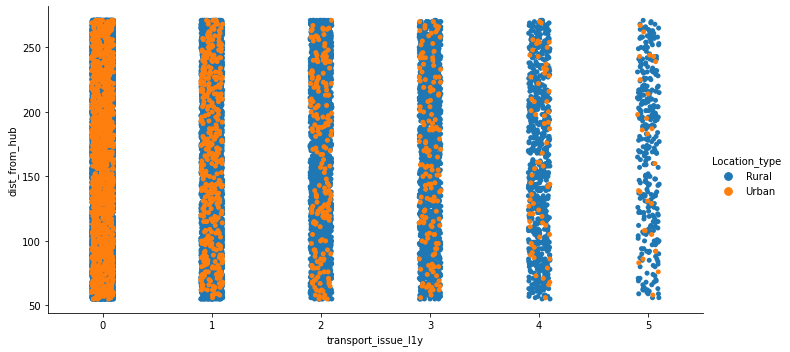

In [58]:
sns.catplot(data=df, x='transport_issue_l1y', y='dist_from_hub', hue='Location_type', height=5, aspect=2)

In [64]:
df.groupby(['Location_type', 'zone', 'WH_regional_zone'])[['transport_issue_l1y', 'dist_from_hub']].agg(['mean', 'count'])

transport_issue_l1y       dist_from_hub  \
                                                    mean count          mean   
Location_type zone  WH_regional_zone                                           
Rural         East  Zone 1                      0.945946    37    172.135135   
                    Zone 3                      0.760000   100    176.500000   
                    Zone 4                      0.856061   132    154.924242   
                    Zone 5                      0.700000    70    151.528571   
                    Zone 6                      0.785714    56    167.428571   
              North Zone 1                      0.807888   786    161.767176   
                    Zone 2                      0.753512   783    165.306513   
                    Zone 3                      0.754587   872    161.321101   
                    Zone 4                      0.816231  1072    162.699627   
                    Zone 5                      0.816014  1761    163.566156   
                    Zone 6                      0.757635  4126    163.284052   
              South Zone 1                      0.787066   634    162.135647   
                    Zone 2                      0.734967  1347    162.850037   
                    Zone 3                      0.813268   814    162.864865   
                    Zone 4                      0.802469   810    166.870370   
                    Zone 5                      0.706287  1018    165.074656   
                    Zone 6                      0.797297  1258    165.262321   
              West  Zone 1                      0.769401   451    161.532151   
                    Zone 2                      0.730132   604    158.284768   
                    Zone 3                      0.776596   846    163.394799   
                    Zone 4                      0.780134  1792    165.839286   
                    Zone 5                      0.756026  1369    165.151936   
                    Zone 6                      0.741776  2219    163.675079   
Urban         East  Zone 1                      0.166667     6    167.333333   
                    Zone 3                      0.833333    12    114.583333   
                    Zone 4                      0.900000    10    170.400000   
                    Zone 5                      0.500000     4    198.250000   
                    Zone 6                      0.000000     2    221.000000   
              North Zone 1                      1.090909    55    167.800000   
                    Zone 2                      0.830986    71    163.028169   
                    Zone 3                      0.887640    89    165.887640   
                    Zone 4                      0.763158   114    158.578947   
                    Zone 5                      0.653846   156    161.217949   
                    Zone 6                      0.814249   393    157.964377   
              South Zone 1                      1.000000    46    164.000000   
                    Zone 2                      0.731959    97    166.247423   
                    Zone 3                      0.887324    71    168.647887   
                    Zone 4                      0.722222    72    158.861111   
                    Zone 5                      0.629213    89    159.078652   
                    Zone 6                      1.103774   106    161.424528   
              West  Zone 1                      0.358974    39    167.974359   
                    Zone 2                      0.672131    61    171.672131   
                    Zone 3                      0.831169    77    161.090909   
                    Zone 4                      0.758621   174    168.936782   
                    Zone 5                      0.825000   120    161.416667   
                    Zone 6                      0.966480   179    161.055866   

                                            
                                     count  
Location_type zone  WH_reg

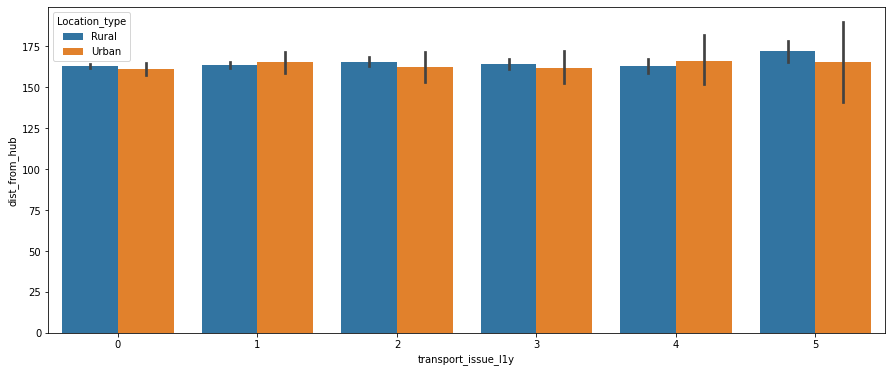

In [60]:
plt.figure(figsize=(15, 6))
sns.barplot(data=df, x='transport_issue_l1y', y='dist_from_hub', hue='Location_type')
plt.show()

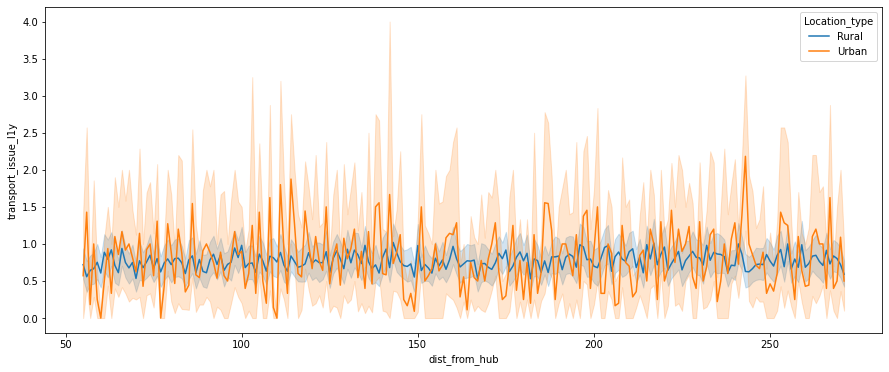

In [66]:
plt.figure(figsize=(15, 6))
sns.lineplot(data=df, x='dist_from_hub', y='transport_issue_l1y', hue='Location_type')
plt.show()

In [67]:
df.columns

Index(['Location_type', 'zone', 'WH_regional_zone', 'num_refill_req_l3m',
       'Competitor_in_mkt', 'Comp_Ref_Ratio', 'Ware_house_ID', 'WH_Manager_ID',
       'WH_capacity_size', 'transport_issue_l1y', 'retail_shop_num',
       'wh_owner_type', 'distributor_num', 'flood_impacted', 'flood_proof',
       'electric_supply', 'dist_from_hub', 'workers_num', 'wh_est_year',
       'storage_issue_reported_l3m', 'temp_reg_mach',
       'approved_wh_govt_certificate', 'wh_breakdown_l3m', 'govt_check_l3m',
       'product_wg_ton', 'Prop_Demand_E_Pk'],
      dtype='object')

In [78]:
dist_loc = df.groupby('Location_type')['distributor_num'].value_counts().reset_index(name='Value Counts')
dist_loc

,Location_type,distributor_num,Value Counts
0,Rural,31,451
1,Rural,37,447
2,Rural,69,447
3,Rural,21,443
4,Rural,41,438
...,...,...,...
107,Urban,55,29
108,Urban,60,29
109,Urban,67,29
110,Urban,23,28


In [79]:
dist_loc.loc[dist_loc['Value Counts'] > 100, :]

,Location_type,distributor_num,Value Counts
0,Rural,31,451
1,Rural,37,447
2,Rural,69,447
3,Rural,21,443
4,Rural,41,438
5,Rural,28,437
6,Rural,29,437
7,Rural,47,436
8,Rural,40,435
9,Rural,42,433


In [80]:
dist_loc.loc[dist_loc['Value Counts'] < 100, :]

,Location_type,distributor_num,Value Counts
56,Urban,26,51
57,Urban,59,49
58,Urban,33,47
59,Urban,32,44
60,Urban,41,43
61,Urban,62,43
62,Urban,24,42
63,Urban,27,42
64,Urban,29,42
65,Urban,40,42


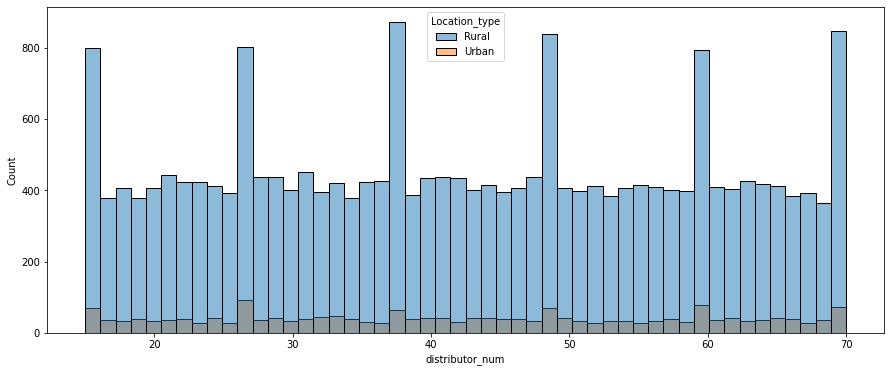

In [91]:
plt.figure(figsize=(15, 6))
sns.histplot(data=df, x='distributor_num', hue='Location_type', bins=50)
plt.show()

<AxesSubplot:xlabel='Location_type,distributor_num'>

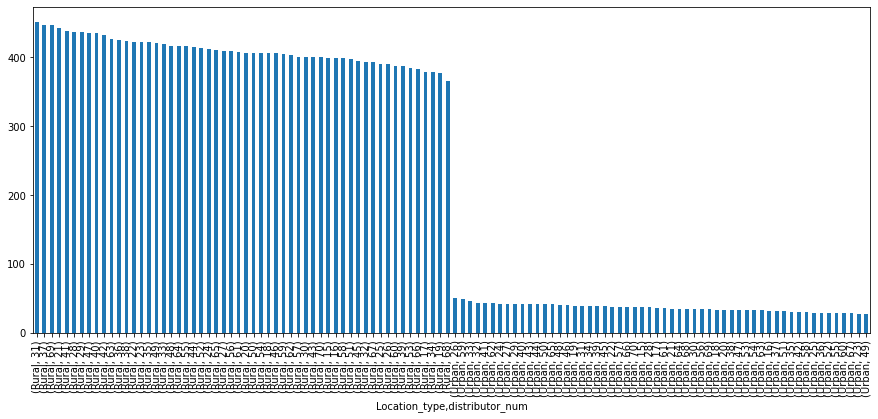

In [89]:
df.groupby('Location_type')['distributor_num'].value_counts().plot(figsize=(15, 6), kind='bar')

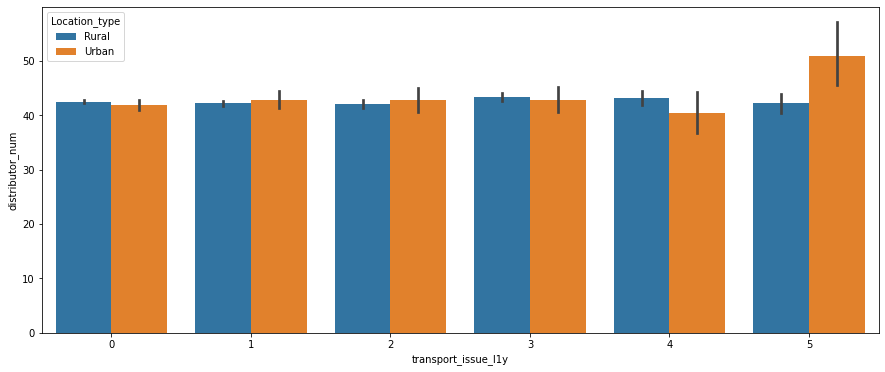

In [72]:
plt.figure(figsize=(15, 6))
sns.barplot(data=df, x='transport_issue_l1y', y='distributor_num', hue='Location_type')
plt.show()

In [73]:
df.loc[(df['distributor_num'] >= 45), :]

,Location_type,zone,WH_regional_zone,num_refill_req_l3m,Competitor_in_mkt,Comp_Ref_Ratio,Ware_house_ID,WH_Manager_ID,WH_capacity_size,transport_issue_l1y,retail_shop_num,wh_owner_type,distributor_num,flood_impacted,flood_proof,electric_supply,dist_from_hub,workers_num,wh_est_year,storage_issue_reported_l3m,temp_reg_mach,approved_wh_govt_certificate,wh_breakdown_l3m,govt_check_l3m,product_wg_ton,Prop_Demand_E_Pk
2,Rural,East,Zone 1,6,3,1.600000,WH_115101,EID_65101,Small,0,5182,Company Owned,50,0,0,0,59,22.0,NaN,4,1,C,3,31,5060,0.216216
5,Rural,East,Zone 1,6,5,2.000000,WH_120724,EID_70724,Small,5,4527,Company Owned,64,0,0,0,71,34.0,NaN,25,0,A,3,31,32056,0.216216
8,Rural,East,Zone 1,0,6,0.857143,WH_107431,EID_57431,Small,0,4347,Company Owned,53,0,0,1,220,21.0,NaN,0,0,NaN,0,16,4106,0.162162
9,Rural,East,Zone 1,0,6,0.857143,WH_108904,EID_58904,Small,0,4296,Rented,59,0,0,1,237,49.0,NaN,25,0,A,5,31,31120,0.162162
12,Rural,East,Zone 1,0,5,1.500000,WH_110349,EID_60349,Small,1,4430,Company Owned,54,0,0,0,164,39.0,NaN,16,0,C,3,16,20126,0.162162
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24995,Urban,West,Zone 6,2,2,0.322581,WH_109044,EID_59044,Large,2,4610,Rented,70,0,0,1,205,30.0,NaN,20,0,A,5,6,25145,0.055866
24996,Urban,West,Zone 6,2,2,0.322581,WH_111484,EID_61484,Large,2,4288,Company Owned,59,0,0,1,55,33.0,NaN,22,0,A,3,23,29118,0.055866
24997,Urban,West,Zone 6,2,2,0.322581,WH_113519,EID_63519,Large,0,4104,Company Owned,68,0,1,1,119,22.0,NaN,29,0,B+,3,6,35073,0.055866
24998,Urban,West,Zone 6,2,2,0.322581,WH_118015,EID_68015,Large,0,5280,Company Owned,69,0,0,1,213,37.0,NaN,26,0,B+,3,23,33070,0.055866


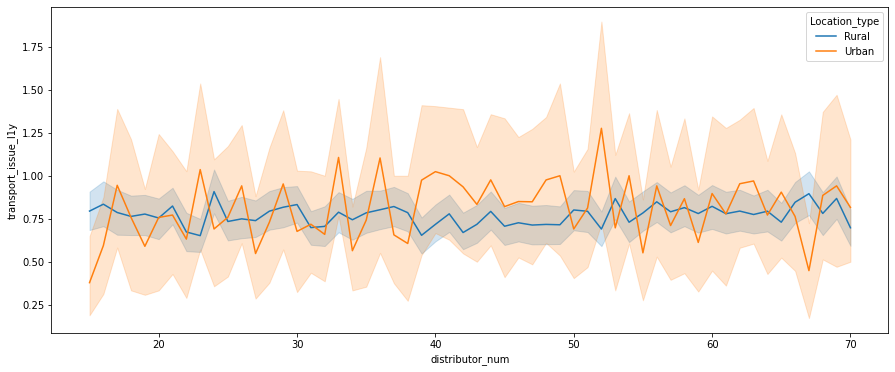

In [68]:
plt.figure(figsize=(15, 6))
sns.lineplot(data=df, x='distributor_num', y='transport_issue_l1y', hue='Location_type')
plt.show()

In [ ]:
distributor_num num_refill_req_l3m retail_shop_num

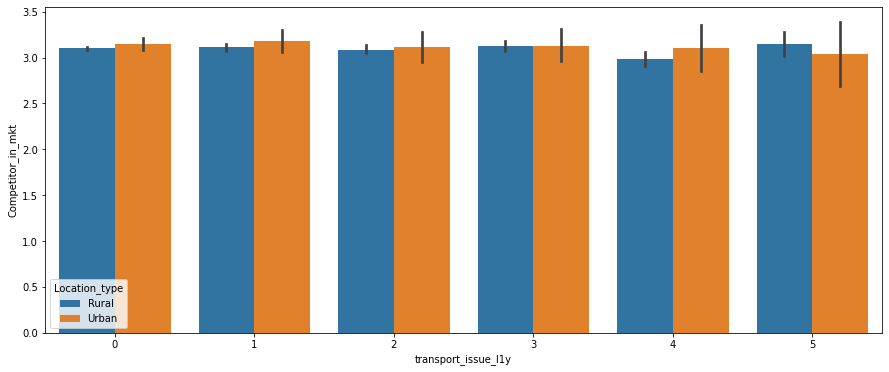

In [96]:
plt.figure(figsize=(15, 6))
sns.barplot(data=df, x='transport_issue_l1y', y='Competitor_in_mkt', hue='Location_type')
plt.show()

In [140]:
df['age'] = df['wh_est_year'].apply(lambda x: 2023 - x)

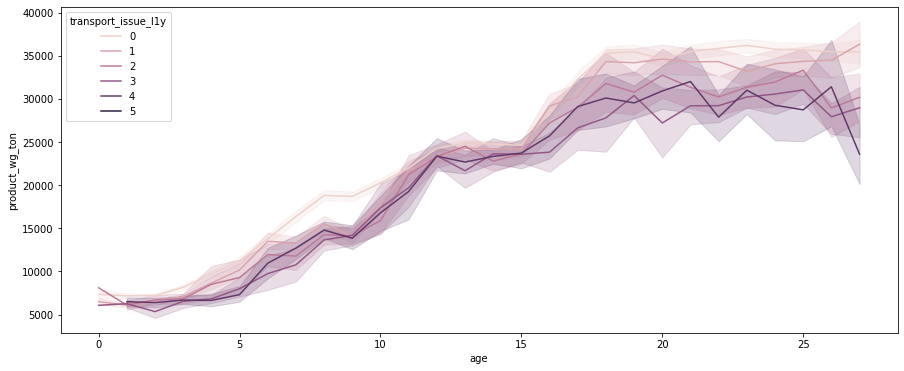

In [104]:
plt.figure(figsize=(15, 6))
sns.lineplot(data=df, x='age', y='product_wg_ton', hue='transport_issue_l1y')
plt.show()

In [136]:
df.groupby(['Location_type', 'zone', 'WH_regional_zone'])['WH_capacity_size'].value_counts()

Location_type  zone   WH_regional_zone  WH_capacity_size
Rural          East   Zone 1            Small                 37
                      Zone 3            Mid                  100
                      Zone 4            Mid                  132
                      Zone 5            Large                 70
                      Zone 6            Small                 56
               North  Zone 1            Small                786
                      Zone 2            Mid                  783
                      Zone 3            Mid                  872
                      Zone 4            Mid                 1072
                      Zone 5            Large               1761
                      Zone 6            Large               3258
                                        Small                868
               South  Zone 1            Small                634
                      Zone 2            Mid                 1347
                      Zone 3     

In [134]:
df.groupby(['Location_type', 'zone', 'WH_regional_zone', 'WH_capacity_size'])['product_wg_ton'].agg(['mean', 'count'])

mean  count
Location_type zone  WH_regional_zone WH_capacity_size                     
Rural         East  Zone 1           Small             19509.108108     37
                    Zone 3           Mid               22125.090000    100
                    Zone 4           Mid               23214.030303    132
                    Zone 5           Large             23981.428571     70
                    Zone 6           Small             21375.232143     56
              North Zone 1           Small             21950.975827    786
                    Zone 2           Mid               22028.320562    783
                    Zone 3           Mid               21882.560780    872
                    Zone 4           Mid               21716.166045   1072
                    Zone 5           Large             22012.028393   1761
                    Zone 6           Large             21781.424187   3258
                                     Small             22070.191244    868
              South Zone 1           Small             21391.212934    634
                    Zone 2           Mid               22236.262064   1347
                    Zone 3           Mid               21103.411548    814
                    Zone 4           Mid               21528.919753    810
                    Zone 5           Large             21532.983301   1018
                    Zone 6           Large             22160.885776    464
                                     Small             22049.216625    794
              West  Zone 1           Small             21274.880266    451
                    Zone 2           Mid               22619.571192    604
                    Zone 3           Mid               22310.394799    846
                    Zone 4           Mid               21926.595424   1792
                    Zone 5           Large             21307.607743   1369
                    Zone 6           Large             22047.808771   1391
                                     Small             21445.983092    828
Urban         East  Zone 1           Small             25083.500000      6
                    Zone 3           Mid               26181.250000     12
                    Zone 4           Mid               24191.900000     10
                    Zone 5           Large             22343.500000      4
                    Zone 6           Small             38611.500000      2
              North Zone 1           Small             22048.436364     55
                    Zone 2           Mid               24199.394366     71
                    Zone 3           Mid               25327.438202     89
                    Zone 4           Mid               26094.640351    114
                    Zone 5           Large             26473.929487    156
                    Zone 6           Large             25980.577778    315
                                     Small             24939.782051     78
              South Zone 1           Small             24366.021739     46
                    Zone 2           Mid               25934.577320     97
                    Zone 3           Mid               22985.098592     71
                    Zone 4           Mid               24892.291667     72
                    Zone 5           Large             24641.797753     89
                    Zone 6           Large             23580.840909     44
                                     Small             22715.548387     62
              West  Zone 1           Small             26749.384615     39
                    Zone 2           Mid               24333.049180     61
                    Zone 3           Mid               22637.636364     77
                    Zone 4           Mid               25932.241379    174
                    Zone 5           Large             25605.100000    120
                    Zone 6           Large             23507.054545    110
                                     Small             23916.260870     69

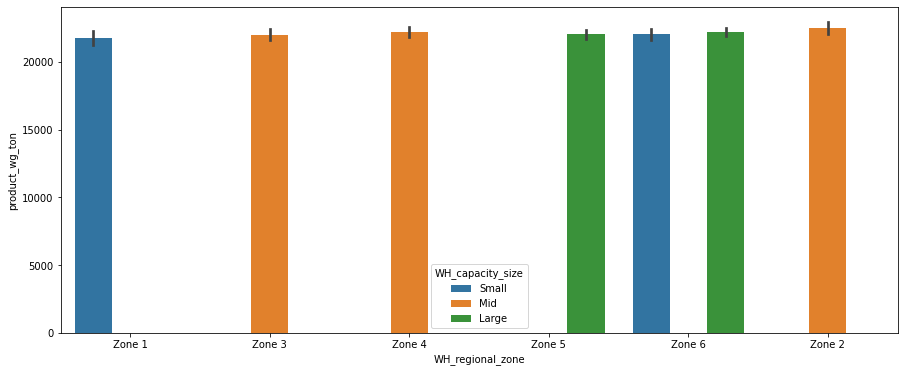

In [127]:
plt.figure(figsize=(15, 6))
sns.barplot(data=df, x='WH_regional_zone', y='product_wg_ton', hue='WH_capacity_size')
plt.show()

In [141]:
df.head()

,Location_type,zone,WH_regional_zone,num_refill_req_l3m,Competitor_in_mkt,Comp_Ref_Ratio,Ware_house_ID,WH_Manager_ID,WH_capacity_size,transport_issue_l1y,retail_shop_num,wh_owner_type,distributor_num,...,flood_proof,electric_supply,dist_from_hub,workers_num,wh_est_year,storage_issue_reported_l3m,temp_reg_mach,approved_wh_govt_certificate,wh_breakdown_l3m,govt_check_l3m,product_wg_ton,Prop_Demand_E_Pk,age
0,Rural,East,Zone 1,6,6,1.142857,WH_119397,EID_69397,Small,1,6219,Company Owned,43,...,0,1,245,34.0,2009.0,20,1,A+,3,16,25139,0.216216,14.0
1,Rural,East,Zone 1,6,6,1.142857,WH_122017,EID_72017,Small,1,3610,Rented,41,...,0,0,218,18.0,NaN,14,0,B+,6,16,16088,0.216216,NaN
2,Rural,East,Zone 1,6,3,1.600000,WH_115101,EID_65101,Small,0,5182,Company Owned,50,...,0,0,59,22.0,NaN,4,1,C,3,31,5060,0.216216,NaN
3,Rural,East,Zone 1,6,4,1.600000,WH_104017,EID_54017,Small,0,4210,Company Owned,41,...,0,1,87,NaN,2020.0,8,0,B+,2,31,9131,0.216216,3.0
4,Rural,East,Zone 1,6,5,2.000000,WH_103234,EID_53234,Small,0,5597,Company Owned,15,...,0,0,99,40.0,2011.0,19,0,B+,2,31,22130,0.216216,12.0


In [143]:
df.to_csv('Updated_frame_2.csv', index=False)